In [233]:
import random
import numpy as np
import functools

import utils

In [234]:
POP_SIZE = 100
IND_LEN = 25
CX_PROB = 0.8
MUT_PROB = 0.05
MUT_FLIP_PROB = 0.1
N = 1

In [235]:
# creates a single individual of lenght `lenght`
def create_ind(length):
    return [random.randint(0, 1) for _ in range(length)]

In [236]:
# creates a population of `size` individuals
def create_population(size):
    return [create_ind(IND_LEN) for _ in range(size)]

In [237]:
# tournament selection
def tour_selection(pop, fits):
    selected = []
    for _ in range(len(pop)):
        i1, i2 = random.randrange(0, len(pop)), random.randrange(0, len(pop))
        if fits[i1] > fits[i2]:
            selected.append(pop[i1])
        else: 
            selected.append(pop[i2])
    return selected

In [238]:
# roulette wheel selection
def selection(pop, fits):
    return random.choices(pop, fits, k=POP_SIZE)

In [239]:
# one point crossover
def cross(p1, p2):
    point = random.randint(0, len(p1))
    o1 = p1[:point] + p2[point:]
    o2 = p2[:point] + p1[point:]
    return o1, o2

In [240]:
# applies crossover to all individuals
def crossover(pop, cross):
    off = []
    for p1, p2 in zip(pop[0::2], pop[1::2]):
        o1, o2 = p1[:], p2[:]
        if random.random() < CX_PROB:
            o1, o2 = cross(p1[:], p2[:])
        off.append(o1)
        off.append(o2)
    return off

In [241]:
def nPointCrossover(ind1, ind2):
    lastInd = 0
    res1, res2 = ind1[:], ind2[:]
    for index in range(N):
        split = random.randrange(lastInd, (len(ind1) - N + (index+1)))
        if index % 2 == 0:
            res1[lastInd:split] = ind1[lastInd:split]
            res1[split:] = ind2[split:]
            res2[lastInd:split] = ind2[lastInd:split]
            res2[split:] = ind1[split:]
        else:
            res2[lastInd:split] = ind1[lastInd:split]
            res2[split:] = ind2[split:]
            res1[lastInd:split] = ind2[lastInd:split]
            res1[split:] = ind1[split:]
        lastInd = split + 1
    return res1, res2

In [242]:
# bit-flip mutation
def mutate(p):
    if random.random() < MUT_PROB:
        return [1 - i if random.random() < MUT_FLIP_PROB else i for i in p]
    return p[:]

In [243]:
# applies mutation to the whole population
def mutation(pop, mutate):
    return list(map(mutate, pop))

In [244]:
def swappingMutation(p1):
    if random.random() < MUT_PROB:
        ind1 = random.randrange(0, len(p1)-3)
        ind2 = random.randrange(ind1, len(p1)-2)
        ind3 = random.randrange(ind2, len(p1)-1)
        ind4 = random.randrange(ind3, len(p1))
        seg1 = p1[0:ind1]
        seg2 = p1[ind1:ind2]
        seg3 = p1[ind2:ind3]
        seg4 = p1[ind3:ind4]
        seg5 = p1[ind4:]
        return seg1 + seg4 + seg3 + seg2 + seg5
    else:
        return p1[:]

In [245]:
# applies crossover and mutation
def operators(pop, cross, mutate):
    pop1 = crossover(pop, cross)
    return mutation(pop1, mutate)

In [246]:
# evaluates the fitness of the individual
def fitness(ind):
    return sum(ind)

In [247]:
def alternatingFitness(ind):
    result = 0
    first = ind[0]
    for index, letter in enumerate(ind):
        if index % 2 == 0:
            if letter == first:
                result += 1
        else:
            if letter != first:
                result += 1
    return result

In [248]:
alternatingFitness([1,0,1,0,1,0, 0])

6

In [249]:
# implements the whole EA
def evolutionary_algorithm(fitness, selection, create_pop, crossover, mutation):
    pop = create_pop(POP_SIZE)
    log = []
    for G in range(100):
        fits = list(map(fitness, pop))
        log.append((G, max(fits), sum(fits)/100, G*POP_SIZE))
        #print(G, sum(fits), max(fits)) # prints fitness to console
        mating_pool = selection(pop, fits)
        offspring = operators(mating_pool, crossover, mutation)
        #pop = offspring[:-1]+[max(pop, key=fitness)] #SGA + elitism
        pop = offspring[:] #SGA

    return pop, log

In [250]:
def plotLogs(logs, title="Simple genetic algorithm", color="blue"):
    # extract fitness evaluations and best fitnesses from logs
    evals = []
    best_fit = []
    for log in logs:
        evals.append([l[3] for l in log])
        best_fit.append([l[1] for l in log])
    
    evals = np.array(evals)
    best_fit = np.array(best_fit)

    # plot the converegence graph and quartiles
    import matplotlib.pyplot as plt
    plt.plot(evals[0,:], np.median(best_fit, axis=0), color=color)
    plt.fill_between(evals[0,:], np.percentile(best_fit, q=25, axis=0),
                                np.percentile(best_fit, q=75, axis=0), alpha = 0.2, color=color)
    plt.ylabel("Fitness")
    plt.xlabel("Generace")
    plt.title(title)
    plt.show()

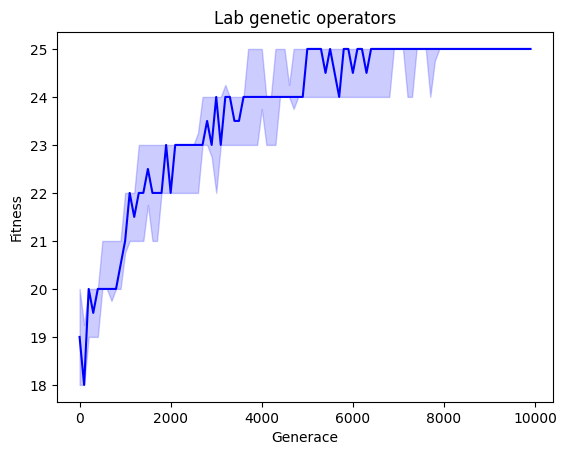

In [251]:
# run the EA 10 times and aggregate the logs, show the last gen in last run
logs = []
for i in range(20):
    random.seed(i)
    pop,log = evolutionary_algorithm(fitness, selection, create_population, cross, mutate)
    logs.append(log)
fits = list(map(fitness, pop))
plotLogs(logs, title="Lab genetic operators")

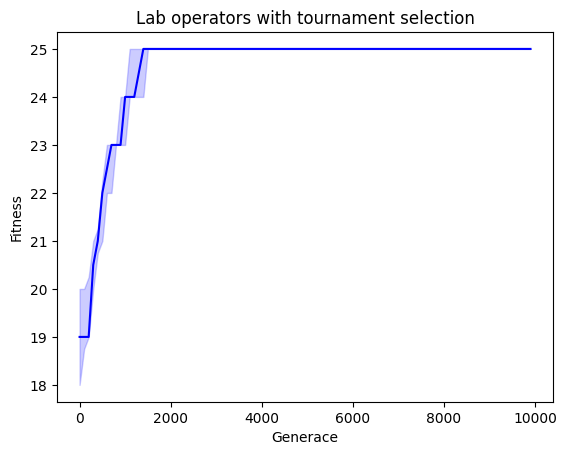

In [252]:
# run the EA 10 times and aggregate the logs, show the last gen in last run
logs = []
for i in range(20):
    random.seed(i)
    pop,log = evolutionary_algorithm(fitness, tour_selection, create_population, cross, mutate)
    logs.append(log)
fits = list(map(fitness, pop))
plotLogs(logs, title="Lab operators with tournament selection")

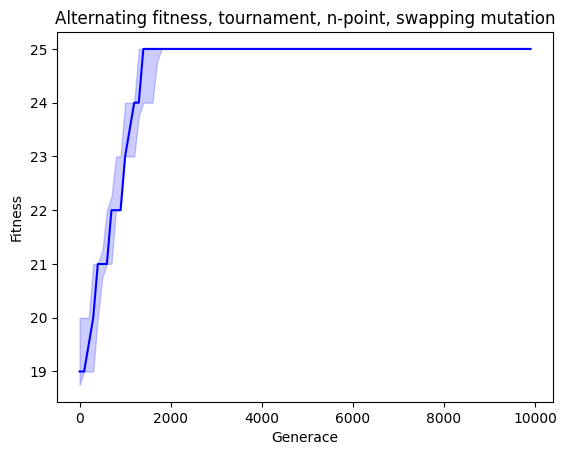

In [253]:
# run the EA 10 times and aggregate the logs, show the last gen in last run
logs = []
for i in range(20):
    #random.seed(i)
    pop,log = evolutionary_algorithm(alternatingFitness, tour_selection, create_population, nPointCrossover, swappingMutation)
    logs.append(log)
fits = list(map(alternatingFitness, pop))
plotLogs(logs, title="Alternating fitness, tournament, n-point, swapping mutation")

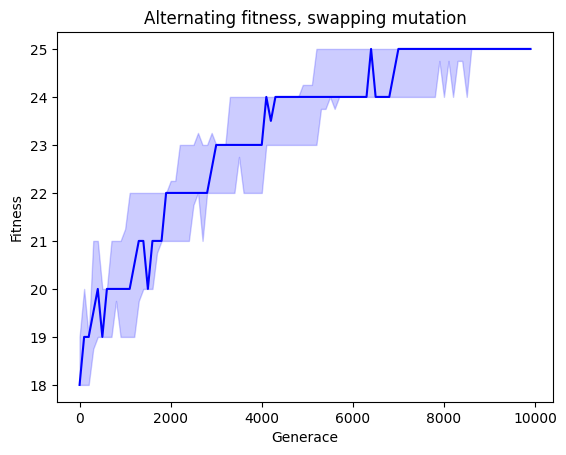

In [254]:
# run the EA 10 times and aggregate the logs, show the last gen in last run
logs = []
for i in range(20):
    #random.seed(i)
    pop,log = evolutionary_algorithm(alternatingFitness, selection, create_population, cross, swappingMutation)
    logs.append(log)
fits = list(map(alternatingFitness, pop))
plotLogs(logs, title="Alternating fitness, swapping mutation")

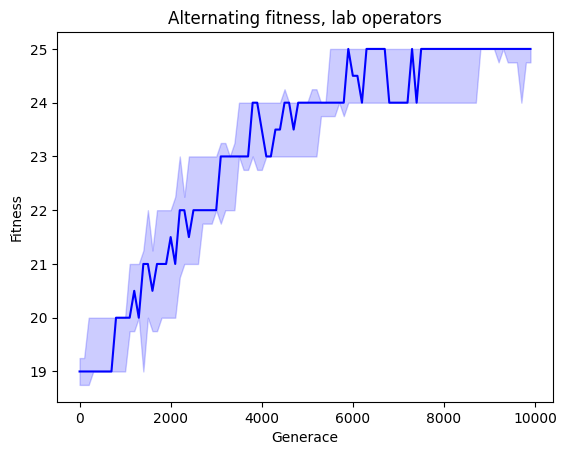

In [255]:
logs = []
for i in range(20):
    #random.seed(i)
    pop,log = evolutionary_algorithm(alternatingFitness, selection, create_population, cross, mutate)
    logs.append(log)
fits = list(map(alternatingFitness, pop))
plotLogs(logs, title="Alternating fitness, lab operators")

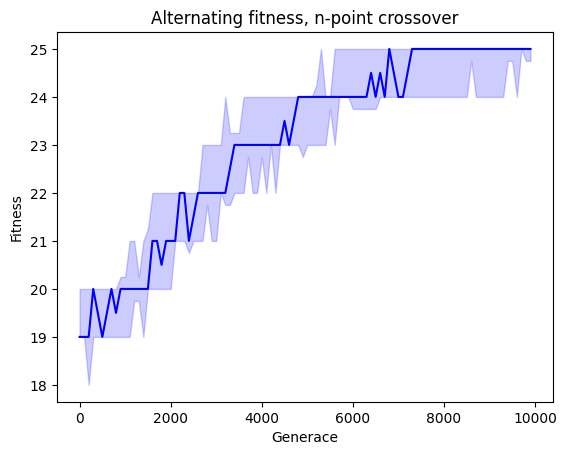

In [256]:
logs = []
for i in range(20):
    #random.seed(i)
    pop,log = evolutionary_algorithm(alternatingFitness, selection, create_population, nPointCrossover, mutate)
    logs.append(log)
fits = list(map(alternatingFitness, pop))
plotLogs(logs, title="Alternating fitness, n-point crossover")

In [282]:
POP_SIZE = 100
IND_LEN = 25
CX_PROB = 0.7
MUT_PROB = 0.1
MUT_FLIP_PROB = 0.1
N = 2

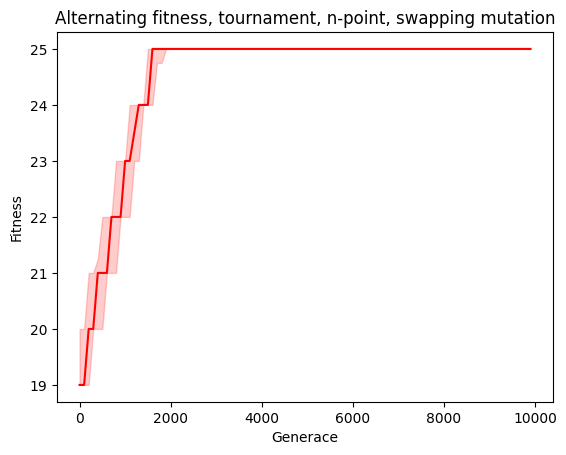

In [283]:
# run the EA 10 times and aggregate the logs, show the last gen in last run
logs = []
for i in range(20):
    #random.seed(i)
    pop,log = evolutionary_algorithm(alternatingFitness, tour_selection, create_population, nPointCrossover, swappingMutation)
    logs.append(log)
fits = list(map(alternatingFitness, pop))
plotLogs(logs, title="Alternating fitness, tournament, n-point, swapping mutation", color="red")

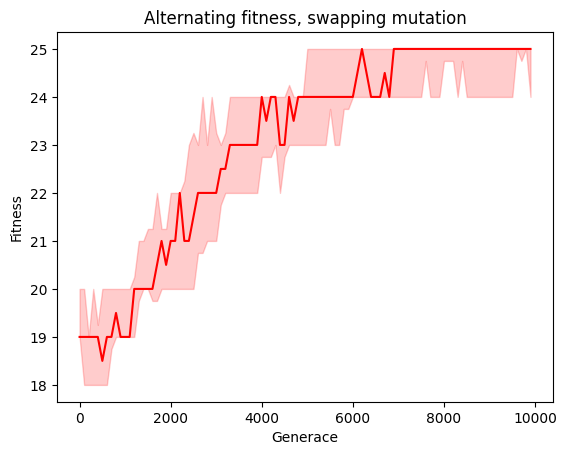

In [284]:
# run the EA 10 times and aggregate the logs, show the last gen in last run
logs = []
for i in range(20):
    #random.seed(i)
    pop,log = evolutionary_algorithm(alternatingFitness, selection, create_population, cross, swappingMutation)
    logs.append(log)
fits = list(map(alternatingFitness, pop))
plotLogs(logs, title="Alternating fitness, swapping mutation", color="red")

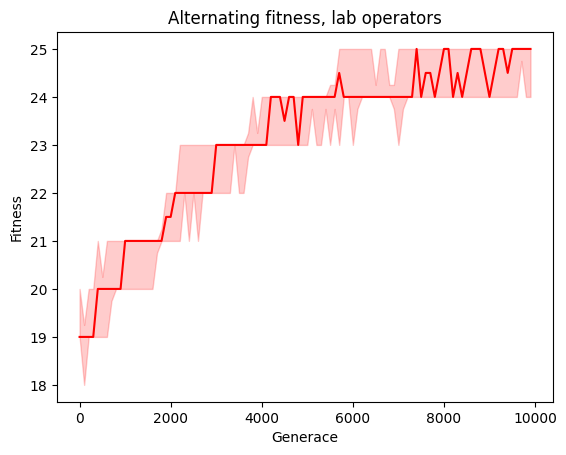

In [285]:
logs = []
for i in range(20):
    #random.seed(i)
    pop,log = evolutionary_algorithm(alternatingFitness, selection, create_population, cross, mutate)
    logs.append(log)
fits = list(map(alternatingFitness, pop))
plotLogs(logs, title="Alternating fitness, lab operators", color="red")

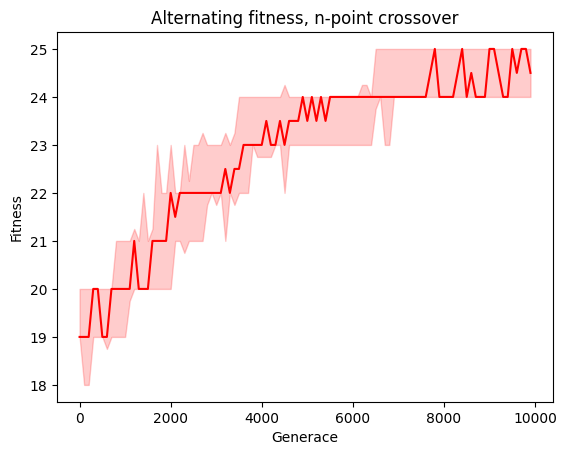

In [286]:
logs = []
for i in range(20):
    #random.seed(i)
    pop,log = evolutionary_algorithm(alternatingFitness, selection, create_population, nPointCrossover, mutate)
    logs.append(log)
fits = list(map(alternatingFitness, pop))
plotLogs(logs, title="Alternating fitness, n-point crossover", color="red")